In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from skimage.feature import graycomatrix, graycoprops
from skimage.transform import rotate
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



# Read files

In [ ]:
# Read the CSV file
trainData = pd.read_csv('/content/drive/MyDrive/Tumor-Classification/trainset.csv')
trainData = trainData.drop(columns='Unnamed: 0')


testData = pd.read_csv('/content/drive/MyDrive/Tumor-Classification/testset.csv')
testData = testData.drop(columns='Unnamed: 0')

In [ ]:
trainData['Image'] = trainData['Id'].apply(lambda x: cv2.imread(f'/content/drive/MyDrive/Tumor-Classification/images/images/{x}.png'))

testData['Image'] = testData['Id'].apply(lambda x: cv2.imread(f'/content/drive/MyDrive/Tumor-Classification/images/images/{x}.png'))

# Image Preprocessing

# convert to grayscale

In [ ]:
# trainData['Image'] = trainData['Image'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2GRAY))
trainData['Image'] = trainData['Image'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2GRAY))

In [ ]:
print(trainData['Image'].isnull().sum())


0


In [ ]:
testData['Image'] = testData['Image'].apply(lambda x: cv2.cvtColor(x , cv2.COLOR_BGR2GRAY))

# Thresholding Techniques

In [ ]:
# trainData['Image'] = trainData['Image'].apply(lambda x: cv2.threshold(x, 128, 255, cv2.THRESH_BINARY)[1])

In [ ]:
# testData['Image'] = testData['Image'].apply(lambda x: cv2.threshold(x, 128, 255, cv2.THRESH_BINARY)[1])

# Noise Removal Techniques

In [ ]:
# trainData['Image'] = trainData['Image'].apply(lambda x: cv2.GaussianBlur(x, (5, 5), 2))
# trainData['Image'] = trainData['Image'].apply(lambda x: cv2.medianBlur(x, 5))
# trainData['Image'] = trainData['Image'].apply(lambda x: cv2.Sobel(x, cv2.CV_64F, 1, 0, ksize=3))
# trainData['Image'] = trainData['Image'].apply(lambda x: cv2.Canny(x, threshold1=100, threshold2=200))
# trainData['Image'] = trainData['Image'].apply(lambda x: cv2.bilateralFilter(x, d=9, sigmaColor=75, sigmaSpace=75))
# trainData['Image'] = trainData['Image'].apply(lambda x: cv2.Laplacian(x, cv2.CV_64F))

# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# trainData['Image'] = trainData['Image'].apply(lambda x: clahe.apply(x))


# trainData['Image'] = trainData['Image'].apply(lambda x: cv2.Sobel(x, cv2.CV_64F, 1, 1, ksize=3))
# trainData['Image'] = trainData['Image'].apply(lambda x: np.abs(x))

# def apply_morphological_ops(image):
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
#     closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#     return closing

# trainData['Image'] = trainData['Image'].apply(apply_morphological_ops)


# def apply_frequency_domain_filter(image):
#     # Apply FFT to the image
#     f_transform = np.fft.fft2(image)
#     f_shift = np.fft.fftshift(f_transform)

#     # Define a high-pass filter
#     rows, cols = image.shape
#     center_row, center_col = rows // 2, cols // 2
#     radius = 30
#     mask = np.ones((rows, cols), np.uint8)
#     cv2.circle(mask, (center_col, center_row), radius, 0, -1)

#     # Apply the filter
#     f_shift_filtered = f_shift * mask

#     # Inverse FFT to obtain the filtered image
#     image_filtered = np.fft.ifft2(np.fft.ifftshift(f_shift_filtered)).real

#     return image_filtered

# trainData['Image'] = trainData['Image'].apply(apply_frequency_domain_filter)

# def apply_anisotropic_diffusion(image, iterations=10, delta_t=0.25, kappa=10):
#     filtered_image = image.copy()
#     rows, cols = image.shape

#     for _ in range(iterations):
#         grad_x = cv2.Sobel(filtered_image, cv2.CV_64F, 1, 0, ksize=3)
#         grad_y = cv2.Sobel(filtered_image, cv2.CV_64F, 0, 1, ksize=3)
#         grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)
#         c = np.exp(-((grad_magnitude / kappa) ** 2))

#         laplacian = cv2.Laplacian(filtered_image, cv2.CV_64F)
#         filtered_image += delta_t * c * laplacian

#     return filtered_image

# trainData['Image'] = trainData['Image'].apply(apply_anisotropic_diffusion)



In [ ]:
# testData['Image'] = testData['Image'].apply(lambda x: cv2.GaussianBlur(x, (5, 5), 2))
# testData['Image'] = testData['Image'].apply(lambda x: cv2.medianBlur(x, 5))
# testData['Image'] = testData['Image'].apply(lambda x: cv2.Sobel(x, cv2.CV_64F, 1, 0, ksize=3))
# testData['Image'] = testData['Image'].apply(lambda x: cv2.Canny(x, threshold1=100, threshold2=200))
# testData['Image'] = testData['Image'].apply(lambda x: cv2.bilateralFilter(x, d=9, sigmaColor=75, sigmaSpace=75))
# testData['Image'] = testData['Image'].apply(lambda x: cv2.Laplacian(x, cv2.CV_64F))

# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# testData['Image'] = testData['Image'].apply(lambda x: clahe.apply(x))

# testData['Image'] = testData['Image'].apply(lambda x: cv2.Sobel(x, cv2.CV_64F, 1, 1, ksize=3))
# testData['Image'] = testData['Image'].apply(lambda x: np.abs(x))

# testData['Image'] = testData['Image'].apply(apply_morphological_ops)


# testData['Image'] = testData['Image'].apply(apply_frequency_domain_filter)

# testData['Image'] = testData['Image'].apply(apply_anisotropic_diffusion)



# Resize

In [ ]:
trainData['Image'] = trainData['Image'].apply(lambda x: cv2.resize(x, (400,400))if x is not None else None)

In [ ]:
testData['Image'] = testData['Image'].apply(lambda x: cv2.resize(x, (400,400))if x is not None else None)

# Histogram

In [ ]:
trainData['Image'] = trainData['Image'].apply(lambda x: cv2.equalizeHist(x))

In [ ]:
testData['Image'] = testData['Image'].apply(lambda x: cv2.equalizeHist(x))

# Augmentation

In [ ]:
def apply_augmentation(image, label, rotation_angle_range=(-10, 10)):
    # Randomly rotate the image within the specified angle range
    if image is not None:  # Check if image is valid
        angle = np.random.randint(rotation_angle_range[0], rotation_angle_range[1])
        # Convert to grayscale if not already
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        augmented_image = rotate(image, angle, mode='edge', preserve_range=True)

        return augmented_image, label
    else:
        # Handle invalid images (e.g., skip or use a placeholder)
        return None, label

# Create augmented dataset
num_augmentations = 3  # Number of augmentations per original image
augmented_data = []

for index, row in trainData.iterrows():
    original_image = row['Image']
    label = row['Class']
    # Check if the image is valid before augmentation
    if original_image is not None:
        augmented_data.extend([apply_augmentation(original_image, label) for _ in range(num_augmentations)])

# Shuffle the augmented dataset
augmented_data = [data for data in augmented_data if data[0] is not None] # Remove entries with None image
np.random.shuffle(augmented_data)

# Separate images and labels
augmented_images = [data[0] for data in augmented_data]
augmented_labels = [data[1] for data in augmented_data]

# Gabor filters

In [ ]:
# ksize = 40
# sigma = 3
# theta = np.pi / 4
# lamda = np.pi / 4
# gamma = 1
# phi = 0

# kernel = cv2.getGaborKernel((ksize , ksize) , sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

# trainData['Image'] = trainData['Image'].apply( lambda x: cv2.filter2D( x , cv2.CV_8U , kernel))


# LDA

In [ ]:

valid_data = trainData[trainData['Image'].notnull()]

X = np.array([img.flatten() for img in valid_data['Image']])

y = valid_data['Class'].values


In [ ]:
from sklearn.preprocessing import StandardScaler

# Check if trainData contains any images
if trainData['Image'].isnull().all():
    raise ValueError("No images found in the original dataset. Please check your data loading.")

valid_data = trainData[trainData['Image'].notnull()]

# Check if valid_data contains any images after filtering
if valid_data.empty:
    raise ValueError("No valid images found after filtering. Please check your filtering conditions.")

X = np.array([img.flatten() for img in valid_data['Image']])

# Extract the corresponding labels
y = valid_data['Class'].values

# Initialize the scaler and fit_transform the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Optionally, check the shape of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (539, 160000)
Shape of y: (539,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [ ]:
vm_model = SVC()

vm_model.fit(X_train, y_train)

SVC()

In [ ]:
X_testData = np.array([img.flatten() for img in testData['Image']])

X_testData = scaler.fit_transform(X_testData)

In [ ]:
# X_test1_lda = lda.transform(X_testData)

In [ ]:
# Make predictions on the test set
y_pred_scv = vm_model.predict(X_test)

In [ ]:
f1 = f1_score(y_test, y_pred_scv ,average='micro')


print("F1 Score:", f1)

F1 Score: 0.6851851851851852


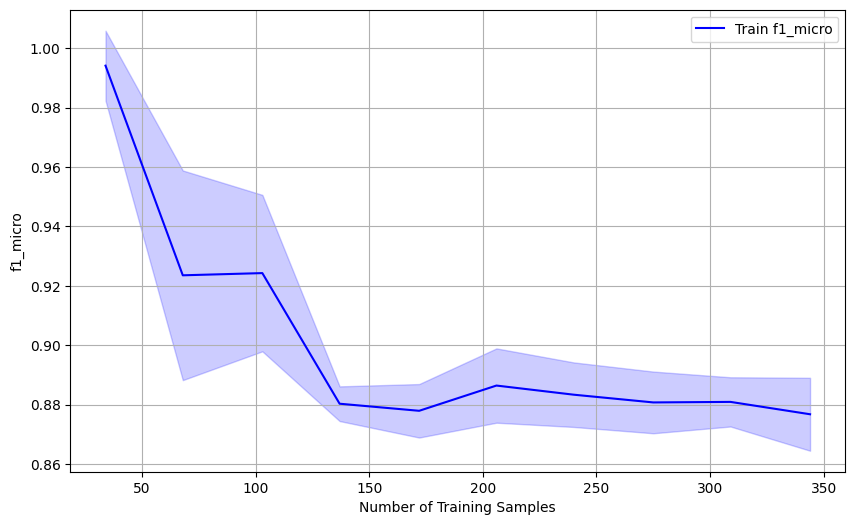

In [ ]:
from sklearn.model_selection import learning_curve

# Create a learning curve plot for MiniBatch K-means using Tf-idf
train_sizes, train_scores, _ = learning_curve(
    estimator=vm_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='f1_micro',
    random_state=42
)

# Calculate mean and standard deviation of train scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train f1_micro', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.xlabel("Number of Training Samples")
plt.ylabel("f1_micro")
# plt.title("Learning Curve for MiniBatch K-means using Tf-idf (Training Data)")
plt.legend(loc="best")
plt.grid()
# plt.savefig('mm.jpg')
plt.show()